### Data Preprocessing

In [1]:
# Import Lybrary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
# from mat4py import loadmat
import warnings
warnings.simplefilter("ignore")

In [2]:
# Set EIS Data Path
eis_path = "C:/Users/jeongbs1/오토실리콘/1. python_code/Practice_with_paper_data_sets/Accelerated SoH estimation of second life LIB via EIS and ML/DIB_Data/EIS_Test"
eis_list = os.listdir(eis_path) # Set EIS File list
eis_col = ["Frequency", "Real_Z", "Imaginary_Z"] # # Set Columns name

# Set EIS Dictionary by DataFrame 
eis_raw_df = {}
for num in np.arange(len(eis_list)):
    eis_Cell = int(eis_list[num].split("_")[0].split("Cell")[1])
    eis_SoH = int(eis_list[num].split("_")[1].split("SOH")[0])
    eis_Temp = int(eis_list[num].split("_")[2].split("degC")[0])
    eis_SoC = int(eis_list[num].split("_")[3].split("SOC")[0])
    eis_raw_df[eis_list[num]] = pd.read_excel(eis_path+"/"+eis_list[num], header=None)
    eis_raw_df[eis_list[num]].columns = eis_col
    eis_raw_df[eis_list[num]]["Cell_name"] = eis_Cell
    eis_raw_df[eis_list[num]]["SoH"] = eis_SoH
    eis_raw_df[eis_list[num]]["Temp"] = eis_Temp
    eis_raw_df[eis_list[num]]["SoC"] = eis_SoC

len(eis_raw_df)

360

In [3]:
# Check the EIS Data Format
eis_raw_df[eis_list[0]]

,Frequency,Real_Z,Imaginary_Z,Cell_name,SoH,Temp,SoC
0,10000.00000,0.02995,0.03160,2,95,15,5
1,7943.00000,0.02827,0.02617,2,95,15,5
2,6310.00000,0.02704,0.02143,2,95,15,5
3,5012.00000,0.02599,0.01736,2,95,15,5
4,3981.00000,0.02499,0.01377,2,95,15,5
...,...,...,...,...,...,...,...
56,0.02512,0.06880,-0.01274,2,95,15,5
57,0.01995,0.06994,-0.01386,2,95,15,5
58,0.01585,0.07112,-0.01552,2,95,15,5
59,0.01259,0.07219,-0.01763,2,95,15,5


In [4]:
# Set Transform DataFrame for Stacking by Cell name
eis_df = pd.DataFrame
for num in np.arange(len(eis_list)):
    wide_format = {}
    for _, row in eis_raw_df[eis_list[num]].iterrows():
        freq = row['Frequency']
        wide_format["Cell_name"] = eis_raw_df[eis_list[num]]["Cell_name"][0]
        wide_format["SoH"] = eis_raw_df[eis_list[num]]["SoH"][0]
        wide_format["Temp"] = eis_raw_df[eis_list[num]]["Temp"][0]
        wide_format["SoC"] = eis_raw_df[eis_list[num]]["SoC"][0]
        wide_format[f'F{freq}_Real_Z'] = row['Real_Z']
        wide_format[f'F{freq}_Imaginary_Z'] = row['Imaginary_Z']
    wide_df = pd.DataFrame([wide_format]) # Transform DataFrame
    info_cols = [col for col in wide_df.columns if not 'Z' in col] # info Colums
    real_cols = [col for col in wide_df.columns if 'Real_Z' in col] # Real Colums 
    imaginary_cols = [col for col in wide_df.columns if 'Imaginary_Z' in col] # Imaginary Colums 
    ordered_cols = info_cols + real_cols + imaginary_cols # Make columns Order
    wide_df = wide_df[ordered_cols] # Set columns Order to DataFrame
    # Stacking DataFrame
    if num == 0:
        eis_df = wide_df
    else:
        eis_df = pd.concat([eis_df, wide_df],axis=0)


In [11]:
# Set Case 1 dataFrame
Case_1_df = eis_df.copy().reset_index(drop=True)
Case_1_df

,Cell_name,SoH,Temp,SoC,F10000.0_Real_Z,F7943.0_Real_Z,F6310.0_Real_Z,F5012.0_Real_Z,F3981.0_Real_Z,F3162.0_Real_Z,...,F0.07943_Imaginary_Z,F0.0631_Imaginary_Z,F0.05012_Imaginary_Z,F0.03981_Imaginary_Z,F0.03162_Imaginary_Z,F0.02512_Imaginary_Z,F0.01995_Imaginary_Z,F0.01585_Imaginary_Z,F0.01259_Imaginary_Z,F0.01_Imaginary_Z
0,2,95,15,5,0.02995,0.02827,0.02704,0.02599,0.02499,0.02480,...,-0.010920,-0.010820,-0.010930,-0.011290,-0.011850,-0.012740,-0.013860,-0.015520,-0.017630,-0.020070
1,2,95,15,20,0.03001,0.02843,0.02716,0.02606,0.02506,0.02487,...,-0.013470,-0.013420,-0.013510,-0.013830,-0.014400,-0.015340,-0.016630,-0.018420,-0.020800,-0.023730
2,2,95,15,50,0.02965,0.02803,0.02671,0.02562,0.02464,0.02443,...,-0.001962,-0.002247,-0.002489,-0.002839,-0.003259,-0.003767,-0.004330,-0.004986,-0.005739,-0.006666
3,2,95,15,70,0.02960,0.02800,0.02668,0.02549,0.02456,0.02437,...,-0.002942,-0.003205,-0.003669,-0.004079,-0.004640,-0.005202,-0.005916,-0.006736,-0.007741,-0.008845
4,2,95,15,95,0.02958,0.02797,0.02667,0.02556,0.02457,0.02436,...,-0.002642,-0.002837,-0.003103,-0.003370,-0.003754,-0.004113,-0.004542,-0.005049,-0.005576,-0.006200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,32,100,35,5,0.02993,0.02819,0.02674,0.02562,0.02455,0.02430,...,-0.004928,-0.005353,-0.006026,-0.006794,-0.007799,-0.009059,-0.010650,-0.012700,-0.015030,-0.017890
356,32,100,35,20,0.03003,0.02824,0.02683,0.02569,0.02458,0.02433,...,-0.001759,-0.002010,-0.002282,-0.002663,-0.003074,-0.003493,-0.004065,-0.004740,-0.005525,-0.006446
357,32,100,35,50,0.03006,0.02826,0.02679,0.02558,0.02451,0.02425,...,-0.001566,-0.001745,-0.001995,-0.002282,-0.002574,-0.003026,-0.003353,-0.003912,-0.004484,-0.005220
358,32,100,35,70,0.03007,0.02818,0.02675,0.02562,0.02443,0.02416,...,-0.002137,-0.002395,-0.002702,-0.003021,-0.003405,-0.003824,-0.004311,-0.004936,-0.005685,-0.006511


In [ ]:
# Set Case 3 dataFrame
Case_2_df = eis_df.copy().reset_index(drop=True)
Case_2_df

,Cell_name,SoH,Temp,SoC,F10000.0_Real_Z,F7943.0_Real_Z,F6310.0_Real_Z,F5012.0_Real_Z,F3981.0_Real_Z,F3162.0_Real_Z,...,F0.07943_Imaginary_Z,F0.0631_Imaginary_Z,F0.05012_Imaginary_Z,F0.03981_Imaginary_Z,F0.03162_Imaginary_Z,F0.02512_Imaginary_Z,F0.01995_Imaginary_Z,F0.01585_Imaginary_Z,F0.01259_Imaginary_Z,F0.01_Imaginary_Z
0,2,95,15,5,0.02995,0.02827,0.02704,0.02599,0.02499,0.02480,...,-0.010920,-0.010820,-0.010930,-0.011290,-0.011850,-0.012740,-0.013860,-0.015520,-0.017630,-0.020070
1,2,95,15,20,0.03001,0.02843,0.02716,0.02606,0.02506,0.02487,...,-0.013470,-0.013420,-0.013510,-0.013830,-0.014400,-0.015340,-0.016630,-0.018420,-0.020800,-0.023730
2,2,95,15,50,0.02965,0.02803,0.02671,0.02562,0.02464,0.02443,...,-0.001962,-0.002247,-0.002489,-0.002839,-0.003259,-0.003767,-0.004330,-0.004986,-0.005739,-0.006666
3,2,95,15,70,0.02960,0.02800,0.02668,0.02549,0.02456,0.02437,...,-0.002942,-0.003205,-0.003669,-0.004079,-0.004640,-0.005202,-0.005916,-0.006736,-0.007741,-0.008845
4,2,95,15,95,0.02958,0.02797,0.02667,0.02556,0.02457,0.02436,...,-0.002642,-0.002837,-0.003103,-0.003370,-0.003754,-0.004113,-0.004542,-0.005049,-0.005576,-0.006200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,32,100,35,5,0.02993,0.02819,0.02674,0.02562,0.02455,0.02430,...,-0.004928,-0.005353,-0.006026,-0.006794,-0.007799,-0.009059,-0.010650,-0.012700,-0.015030,-0.017890
356,32,100,35,20,0.03003,0.02824,0.02683,0.02569,0.02458,0.02433,...,-0.001759,-0.002010,-0.002282,-0.002663,-0.003074,-0.003493,-0.004065,-0.004740,-0.005525,-0.006446
357,32,100,35,50,0.03006,0.02826,0.02679,0.02558,0.02451,0.02425,...,-0.001566,-0.001745,-0.001995,-0.002282,-0.002574,-0.003026,-0.003353,-0.003912,-0.004484,-0.005220
358,32,100,35,70,0.03007,0.02818,0.02675,0.02562,0.02443,0.02416,...,-0.002137,-0.002395,-0.002702,-0.003021,-0.003405,-0.003824,-0.004311,-0.004936,-0.005685,-0.006511


In [50]:
# Set SoH, Temp df by SoC
SoH95_Temp_25_df = Case_2_df[(Case_2_df['SoH']==95)&(Case_2_df['Temp']==25)].reset_index(drop=True)
SoH95_Temp_25_df

,Cell_name,SoH,Temp,SoC,F10000.0_Real_Z,F7943.0_Real_Z,F6310.0_Real_Z,F5012.0_Real_Z,F3981.0_Real_Z,F3162.0_Real_Z,...,F0.07943_Imaginary_Z,F0.0631_Imaginary_Z,F0.05012_Imaginary_Z,F0.03981_Imaginary_Z,F0.03162_Imaginary_Z,F0.02512_Imaginary_Z,F0.01995_Imaginary_Z,F0.01585_Imaginary_Z,F0.01259_Imaginary_Z,F0.01_Imaginary_Z
0,2,95,25,5,0.02972,0.02809,0.02673,0.02566,0.02459,0.02437,...,-0.001755,-0.002001,-0.002248,-0.002550,-0.002911,-0.003378,-0.003918,-0.004482,-0.005177,-0.006035
1,2,95,25,20,0.03010,0.02845,0.02710,0.02604,0.02500,0.02480,...,-0.007505,-0.007895,-0.008460,-0.009252,-0.010250,-0.011580,-0.013310,-0.015530,-0.018380,-0.021650
2,2,95,25,50,0.02972,0.02809,0.02673,0.02566,0.02459,0.02437,...,-0.001755,-0.002001,-0.002248,-0.002550,-0.002911,-0.003378,-0.003918,-0.004482,-0.005177,-0.006035
3,2,95,25,70,0.02972,0.02804,0.02668,0.02555,0.02453,0.02431,...,-0.002529,-0.002832,-0.003188,-0.003584,-0.004047,-0.004553,-0.005196,-0.005912,-0.006780,-0.007817
4,2,95,25,95,0.02977,0.02806,0.02673,0.02557,0.02455,0.02431,...,-0.002204,-0.002448,-0.002702,-0.002986,-0.003318,-0.003709,-0.004087,-0.004513,-0.005057,-0.005692
5,3,95,25,5,0.02944,0.02779,0.02643,0.02528,0.02430,0.02408,...,-0.001673,-0.001912,-0.002172,-0.002478,-0.002859,-0.003251,-0.003739,-0.004362,-0.005017,-0.005817
6,3,95,25,20,0.02977,0.02814,0.02683,0.02574,0.02471,0.02450,...,-0.008275,-0.008627,-0.009174,-0.009907,-0.010900,-0.012260,-0.014010,-0.016220,-0.018960,-0.022500
7,3,95,25,50,0.02944,0.02779,0.02643,0.02528,0.02430,0.02408,...,-0.001673,-0.001912,-0.002172,-0.002478,-0.002859,-0.003251,-0.003739,-0.004362,-0.005017,-0.005817
8,3,95,25,70,0.02933,0.02771,0.02636,0.02527,0.02424,0.02403,...,-0.002445,-0.002742,-0.003069,-0.003458,-0.003906,-0.004385,-0.005014,-0.005722,-0.006544,-0.007605
9,3,95,25,95,0.02942,0.02775,0.02638,0.02541,0.02425,0.02401,...,-0.002087,-0.002303,-0.002510,-0.002830,-0.003158,-0.003543,-0.003916,-0.004360,-0.004892,-0.005518


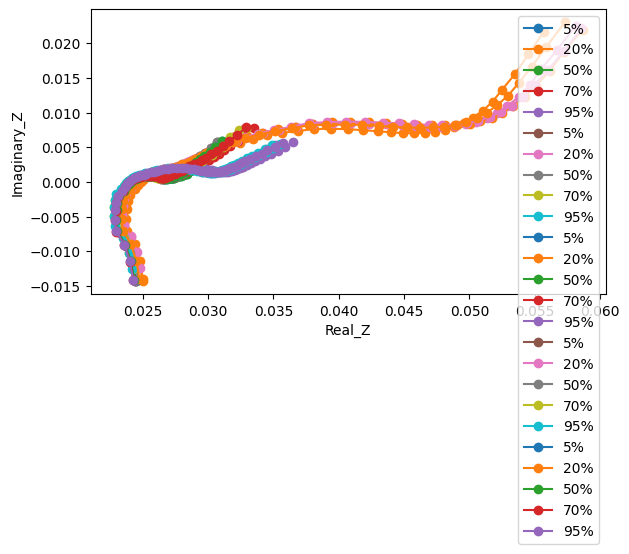

In [85]:
plt.figure()
for row in np.arange(len(SoH95_Temp_25_df)):
    re = SoH95_Temp_25_df.loc[:,"F10000.0_Real_Z":"F0.01_Real_Z"].iloc[row, 4:]
    im = -(SoH95_Temp_25_df.loc[:,"F10000.0_Imaginary_Z":"F0.01_Imaginary_Z"].iloc[row, 4:])
    plt.plot(re,im, "o-", label=str(SoH95_Temp_25_df.loc[:,"SoC"].iloc[row])+"%")
plt.xlabel("Real_Z")
plt.ylabel("Imaginary_Z")
plt.legend(loc="best")
plt.tight_layout()

5